In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**READ DATA**

read data and take a look on its head rows



In [ ]:
dataset = pd.read_csv("listings.csv")
dataset.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,3176,Rental unit in Berlin · ★4.63 · 1 bedroom · 2 ...,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.53471,13.41810,Entire home/apt,83.0,63,148,2023-05-25,0.84,1,15,1,First name and Last name: Nicolas Krotz <br/> ...
1,9991,Rental unit in Berlin · ★5.0 · 4 bedrooms · 7 ...,33852,Philipp,Pankow,Prenzlauer Berg Südwest,52.53269,13.41805,Entire home/apt,180.0,6,7,2020-01-04,0.07,1,47,0,03/Z/RA/003410-18
2,183988,Rental unit in Berlin · ★4.69 · 1 bedroom · 2 ...,882801,Minel,Charlottenburg-Wilm.,Neue Kantstraße,52.50001,13.30349,Entire home/apt,116.0,2,570,2023-11-26,3.92,1,336,50,04/Z/ZA/004232-16
3,14325,Rental unit in Berlin · ★4.68 · Studio · 1 bed...,55531,Chris + Oliver,Pankow,Prenzlauer Berg Nordwest,52.54813,13.40366,Entire home/apt,70.0,150,26,2023-11-30,0.16,4,107,1,NaN
4,16644,Condo in Berlin · ★4.72 · 1 bedroom · 1 bed · ...,64696,Rene,Friedrichshain-Kreuzberg,nördliche Luisenstadt,52.50312,13.43508,Entire home/apt,90.0,93,48,2017-12-14,0.29,2,225,0,NaN


**look at some data description**

we need to know how many rows and columns and what is the feature columns to determine which one can realy effect

we also need to check how many unique values are present for each column

In [ ]:
print('\nRows : ',dataset.shape[0])
print('\nColumns :', dataset.shape[1])
print('\nColumns:',dataset.columns.to_list())
print(' \nUnique:\n',dataset.nunique())



Rows :  13327

Columns : 18

Columns: ['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm', 'license']
 
Unique:
 id                                13327
name                               4143
host_id                            9349
host_name                          3753
neighbourhood_group                  12
neighbourhood                       138
latitude                           9397
longitude                         10426
room_type                             4
price                               472
minimum_nights                      101
number_of_reviews                   480
last_review                        1969
reviews_per_month                   682
calculated_host_listings_count       37
availability_365                    366
number_of_reviews_l

**check nulls**

now we need to check null values on each column and check how to deal with it

In [ ]:
dataset.isnull().sum()

id                                   0
name                                 0
host_id                              0
host_name                            9
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                             3953
minimum_nights                       0
number_of_reviews                    0
last_review                       3000
reviews_per_month                 3000
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           5091
dtype: int64

**handle missing values**

*   license has 5091 null value and this column can not really effect so we can drop it
*   price has 3953 null value , we can calc the avrege of price of rooms in the same neighbourhood_group and has the same room type
*   we can fill nulls at reviews_per_month by zeros considering it didn't have any reviews
*   we also can drop last_review column and enough with reviews_per_month
*  we also can drop rows with null host_name because it isn't trusted




In [ ]:
dataset.fillna({'reviews_per_month':0},inplace=True)
dataset = dataset.drop(["license" , "last_review"] , axis=1)
avg_price = dataset.groupby(['neighbourhood_group' , 'room_type'])['price'].transform('mean')

dataset.fillna({'price' : avg_price },inplace=True)
dataset.dropna(subset=['host_name'], inplace=True)



In [ ]:
dataset

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,3176,Rental unit in Berlin · ★4.63 · 1 bedroom · 2 ...,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.534710,13.418100,Entire home/apt,83.0,63,148,0.84,1,15,1
1,9991,Rental unit in Berlin · ★5.0 · 4 bedrooms · 7 ...,33852,Philipp,Pankow,Prenzlauer Berg Südwest,52.532690,13.418050,Entire home/apt,180.0,6,7,0.07,1,47,0
2,183988,Rental unit in Berlin · ★4.69 · 1 bedroom · 2 ...,882801,Minel,Charlottenburg-Wilm.,Neue Kantstraße,52.500010,13.303490,Entire home/apt,116.0,2,570,3.92,1,336,50
3,14325,Rental unit in Berlin · ★4.68 · Studio · 1 bed...,55531,Chris + Oliver,Pankow,Prenzlauer Berg Nordwest,52.548130,13.403660,Entire home/apt,70.0,150,26,0.16,4,107,1
4,16644,Condo in Berlin · ★4.72 · 1 bedroom · 1 bed · ...,64696,Rene,Friedrichshain-Kreuzberg,nördliche Luisenstadt,52.503120,13.435080,Entire home/apt,90.0,93,48,0.29,2,225,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13322,1048290130755102956,Rental unit in Berlin · ★New · 1 bedroom · 1 b...,168840227,Rounak,Pankow,Prenzlauer Berg Nordwest,52.552905,13.400229,Entire home/apt,47.0,1,0,0.00,1,231,0
13323,1048444986736672883,Rental unit in Berlin · ★New · 1 bedroom · 1 b...,551079357,Esra,Mitte,Alexanderplatz,52.522356,13.426044,Entire home/apt,87.0,2,0,0.00,1,65,0
13324,1048535169043506669,Rental unit in Berlin · ★New · 1 bedroom · 1 b...,551034226,Pietro,Charlottenburg-Wilm.,Volkspark Wilmersdorf,52.485782,13.335904,Entire home/apt,58.0,1,0,0.00,1,171,0
13325,1048637262243761764,Rental unit in Berlin · ★New · 3 bedrooms · 3 ...,29385449,Luis,Mitte,Brunnenstr. Nord,52.544105,13.373386,Entire home/apt,161.0,1,0,0.00,3,11,0



**make sure that we dealed with all null values**

In [ ]:
dataset.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64


**Scatter Plot to show the neighbourhood group based on Latitude and Longitude**

We will plot the same latitude and longitude in a scatter plot to have the cluster of the location, the same we did with the folium maps.



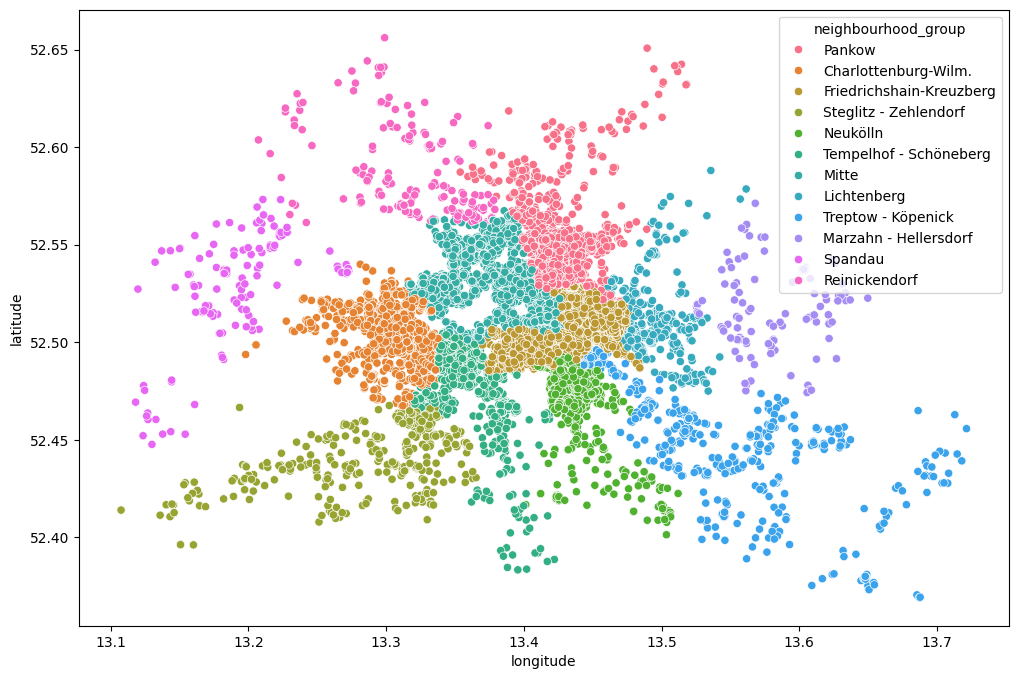

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=dataset.longitude,y=dataset.latitude,hue=dataset.neighbourhood_group)
plt.show()

**Unique Values**

It is very important to understand and analyze the Unique values, this gives a lot of insight to the data and the user preference for a particular choice. We will take Room Type and Neighbourhood group

In [ ]:
print('Unique value for room_type are :',dataset.room_type.unique())
print('Unique value for neighbourhood_group are :',dataset.neighbourhood_group.unique())

Unique value for room_type are : ['Entire home/apt' 'Private room' 'Shared room' 'Hotel room']
Unique value for neighbourhood_group are : ['Pankow' 'Charlottenburg-Wilm.' 'Friedrichshain-Kreuzberg'
 'Steglitz - Zehlendorf' 'Neukölln' 'Tempelhof - Schöneberg' 'Mitte'
 'Lichtenberg' 'Treptow - Köpenick' 'Marzahn - Hellersdorf' 'Spandau'
 'Reinickendorf']


**Finding Total count of each room types**

([<matplotlib.patches.Wedge at 0x7adfa8a5b730>,
 [Text(-0.5086841463055319, 0.975315558830788, 'Entire home/apt'),
  Text(0.4289097323350141, -1.0129345692137803, 'Private room'),
  Text(1.093188864659541, -0.12222154549990069, 'Shared room'),
  Text(1.0994667923194401, -0.03424576742900465, 'Hotel room')])

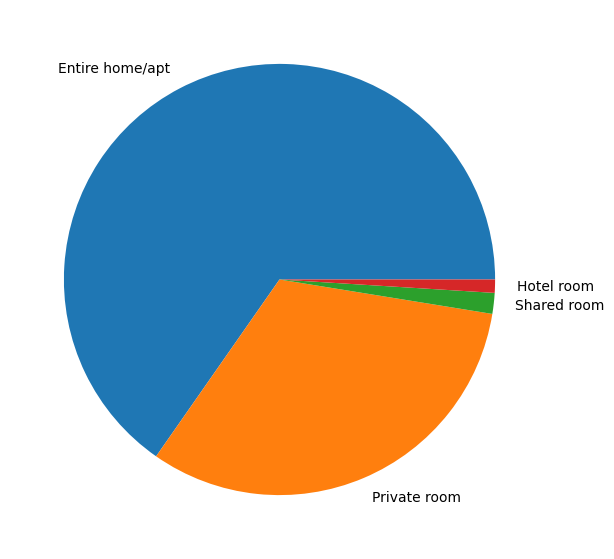

In [ ]:
airbnb_roomtype_frequency = dict(dataset.room_type.value_counts())

room_type = list(airbnb_roomtype_frequency.keys())
data = list(airbnb_roomtype_frequency.values())


fig = plt.figure(figsize=(10, 7))
plt.pie(data, labels=room_type)

**trying to guess prefferd rooms depends on price and location**

we will calculate the avrage of price in every neighbourhood_group

In [ ]:
avg_preffered_price = dataset.groupby(['neighbourhood_group','room_type'], as_index=False)['price'].mean().rename(columns={'neighbourhood_group':'Location','price':'Average Price'})
avg_preffered_price

,Location,room_type,Average Price
0,Charlottenburg-Wilm.,Entire home/apt,124.903319
1,Charlottenburg-Wilm.,Hotel room,154.964286
2,Charlottenburg-Wilm.,Private room,98.731293
3,Charlottenburg-Wilm.,Shared room,47.000000
4,Friedrichshain-Kreuzberg,Entire home/apt,136.411899
5,Friedrichshain-Kreuzberg,Hotel room,178.125000
6,Friedrichshain-Kreuzberg,Private room,73.574751
7,Friedrichshain-Kreuzberg,Shared room,30.027027
8,Lichtenberg,Entire home/apt,126.044872
9,Lichtenberg,Hotel room,100.333333


**Unstack the group by information for plot the graph**

In [ ]:
avg_preffered_price = dataset.groupby(['neighbourhood_group','room_type'])['price'].mean().unstack()
avg_preffered_price

room_type,Entire home/apt,Hotel room,Private room,Shared room
neighbourhood_group,,,,
Charlottenburg-Wilm.,124.903319,154.964286,98.731293,47.000000
Friedrichshain-Kreuzberg,136.411899,178.125000,73.574751,30.027027
Lichtenberg,126.044872,100.333333,56.405797,18.250000
Marzahn - Hellersdorf,102.166667,NaN,1206.186047,NaN
Mitte,155.242274,292.611111,100.534351,74.257143
Neukölln,119.816635,NaN,68.957854,30.272727
Pankow,133.152827,180.173913,70.909091,31.250000
Reinickendorf,99.691358,NaN,62.391892,51.333333
Spandau,112.788732,201.250000,52.852941,13.724138


**Graph of average price of property according to location**

<Axes: xlabel='neighbourhood_group'>

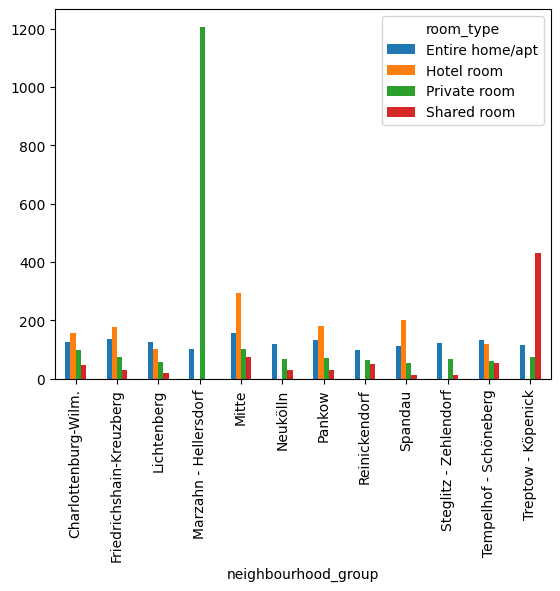

In [ ]:
avg_preffered_price.plot.bar()


**some insights and recommendations from last graph**



*   there is no hotel rooms in [Marzahn - Hellersdorf , Neukölln , Reinickendorf	, Steglitz - Zehlendorf	, Treptow - Köpenick	 ]
*   there is no shared room in Marzahn - Hellersdorf
*  private rooms in Marzahn - Hellersdorf	is overpriced may be because of shortage of room types
*  there is no big difference between private room and shared room in [Tempelhof - Schöneberg	 , Reinickendorf	, Mitte	]
*   shared room in Treptow - Köpenick	 is too expensive





**recommendations**


*   busniessmen should work on building hotel rooms in neighbourhood_groups that don't have this type of rooms
*   travellers takes private room in [Tempelhof - Schöneberg	 , Reinickendorf	, Mitte	] is better than shared room because prices aren't high compared by each other







**Finding Relation between neighbourhood group and availability of rooms**

<ipython-input-14-4ecc3b9c8caa>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=dataset, x='neighbourhood_group',y='availability_365',palette='plasma')
<ipython-input-14-4ecc3b9c8caa>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), size = '15')


[Text(0, 0, 'Pankow'),
 Text(1, 0, 'Charlottenburg-Wilm.'),
 Text(2, 0, 'Friedrichshain-Kreuzberg'),
 Text(3, 0, 'Steglitz - Zehlendorf'),
 Text(4, 0, 'Neukölln'),
 Text(5, 0, 'Tempelhof - Schöneberg'),
 Text(6, 0, 'Mitte'),
 Text(7, 0, 'Lichtenberg'),
 Text(8, 0, 'Treptow - Köpenick'),
 Text(9, 0, 'Marzahn - Hellersdorf'),
 Text(10, 0, 'Spandau'),
 Text(11, 0, 'Reinickendorf')]

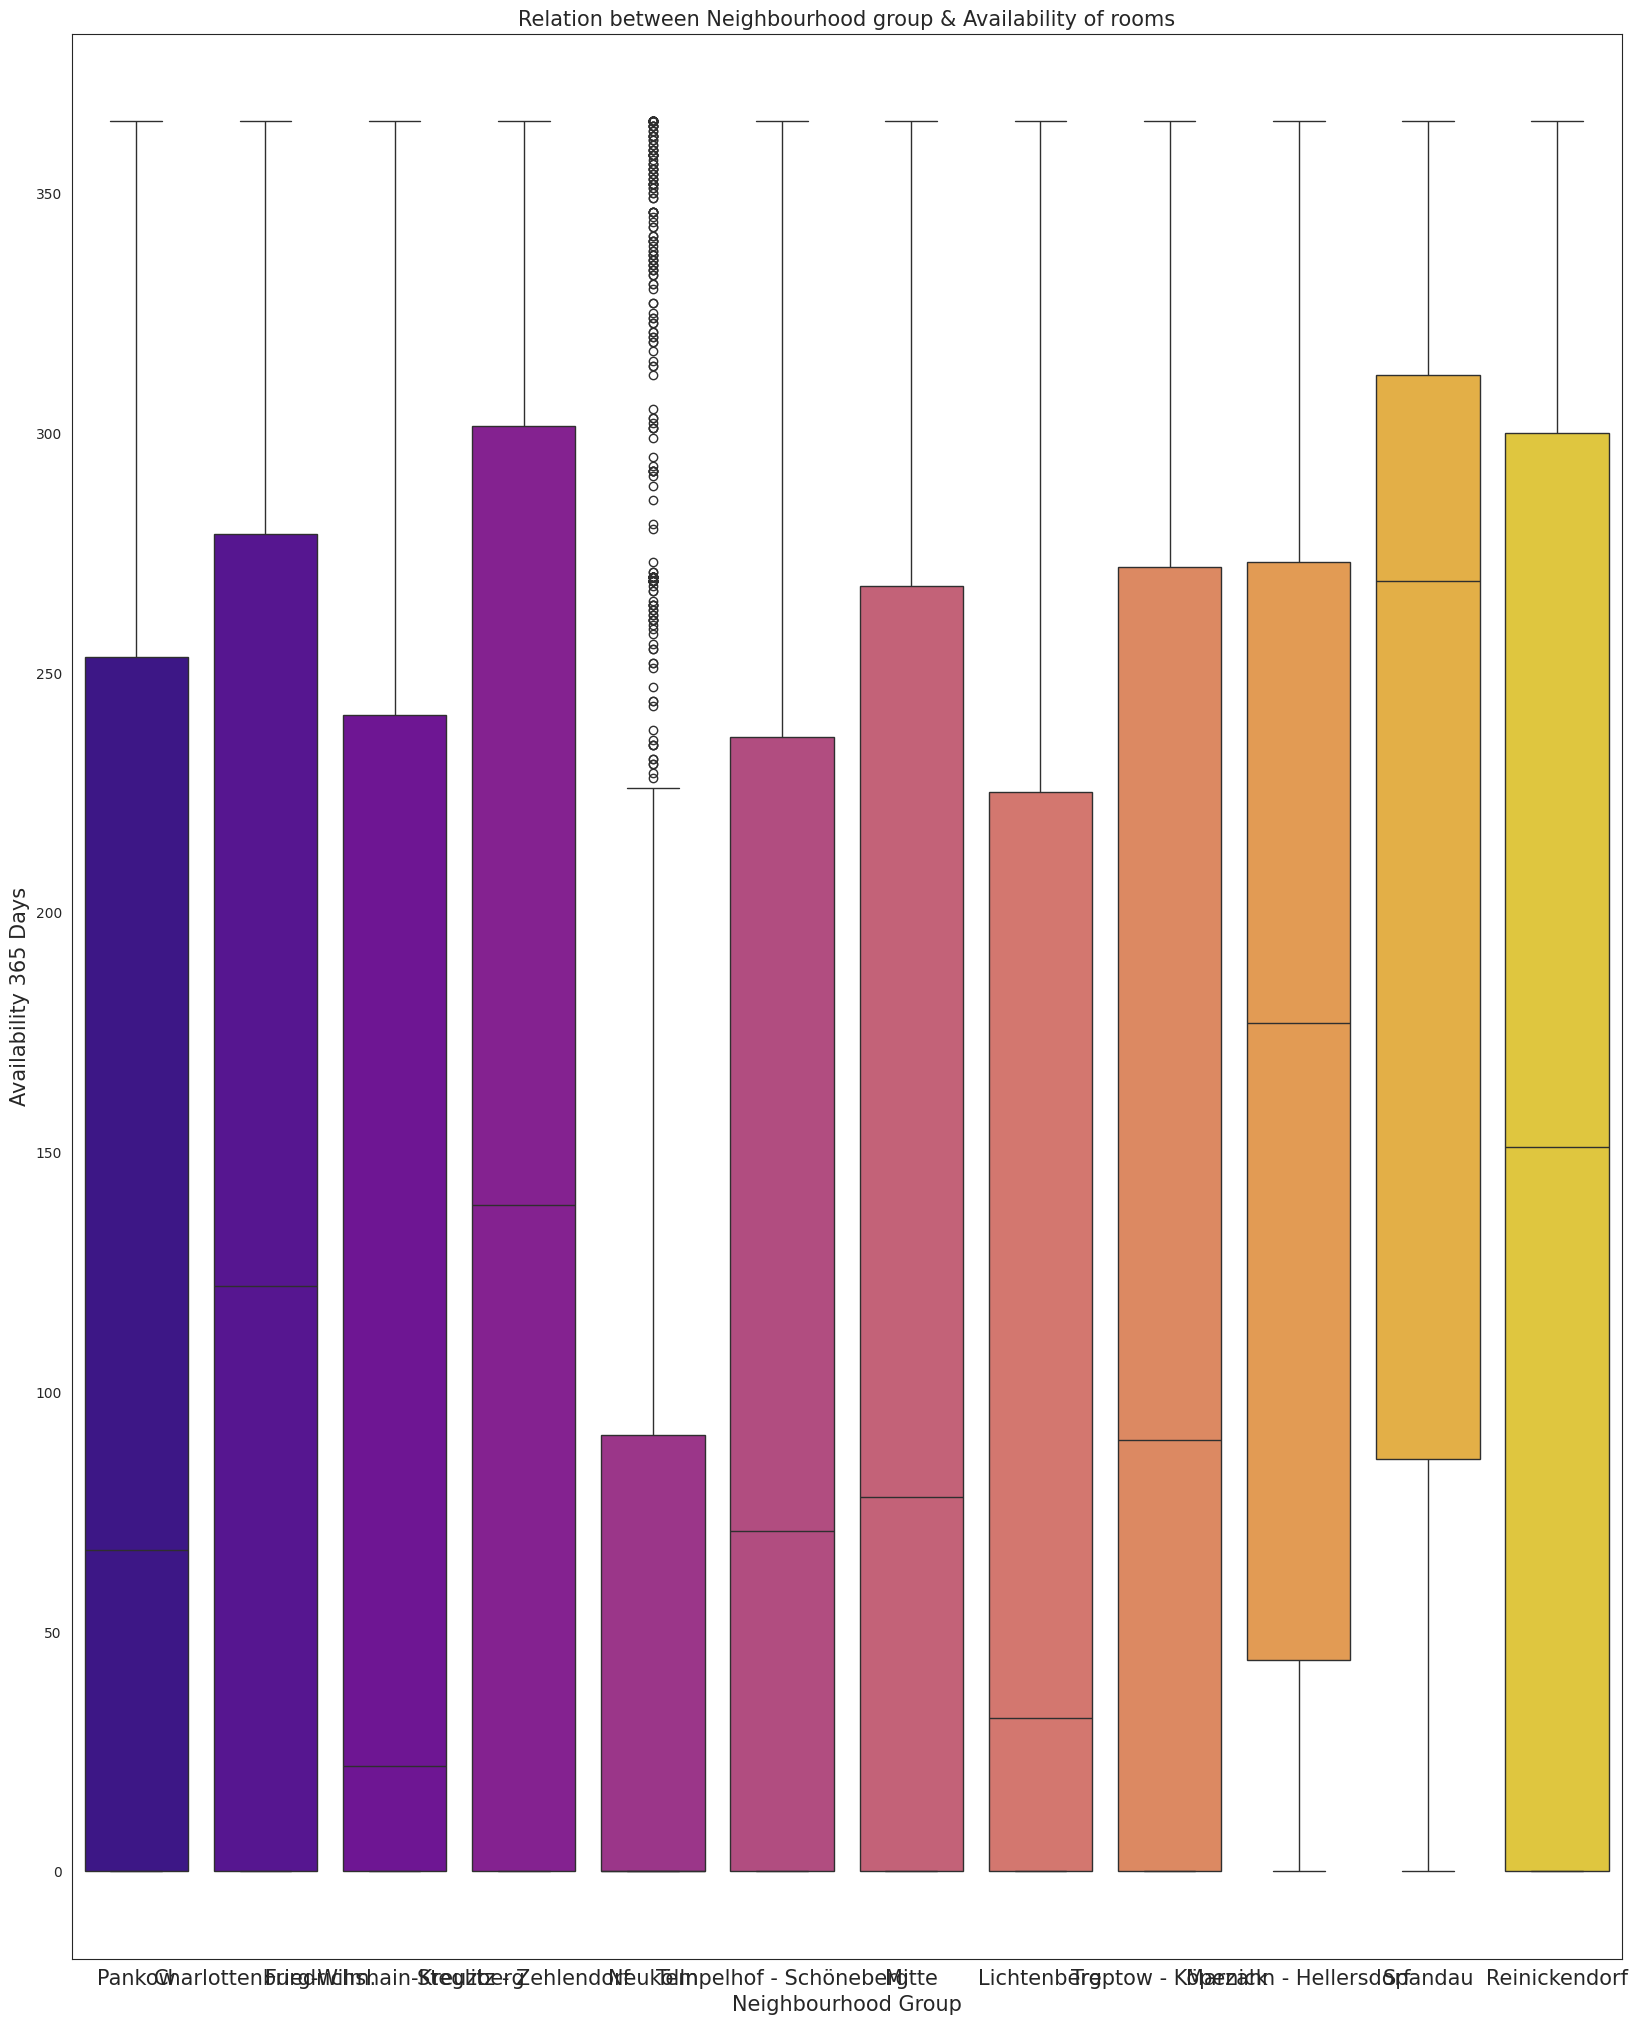

In [ ]:
plt.figure(figsize=(20,25))
sns.set_style('white')

ax = sns.boxplot(data=dataset, x='neighbourhood_group',y='availability_365',palette='plasma')

# Naming the Chart
ax.set_title('Relation between Neighbourhood group & Availability of rooms').set_fontsize('15')

# Naming X & Y axis
ax.set_ylabel('Availability 365 Days').set_fontsize('15')
ax.set_xlabel('Neighbourhood Group').set_fontsize('15')

#Adjusting Bar labels
ax.set_xticklabels(ax.get_xticklabels(), size = '15')

**No. of active host per location (Where most of the host focused to own property)**

In [ ]:
no_of_host_per_location = dataset.groupby('neighbourhood_group',as_index=False)['host_id'].count().sort_values(['host_id'], ascending=False).rename(columns={'neighbourhood_group':'Location','host_id':'Host'})
no_of_host_per_location

,Location,Host
1,Friedrichshain-Kreuzberg,2952
4,Mitte,2885
6,Pankow,2116
5,Neukölln,1535
0,Charlottenburg-Wilm.,1253
10,Tempelhof - Schöneberg,899
11,Treptow - Köpenick,528
2,Lichtenberg,354
9,Steglitz - Zehlendorf,335
7,Reinickendorf,189


**Friedrichshain-Kreuzberg has most of the host focused to own property**

Text(0.5, 0, 'Location')

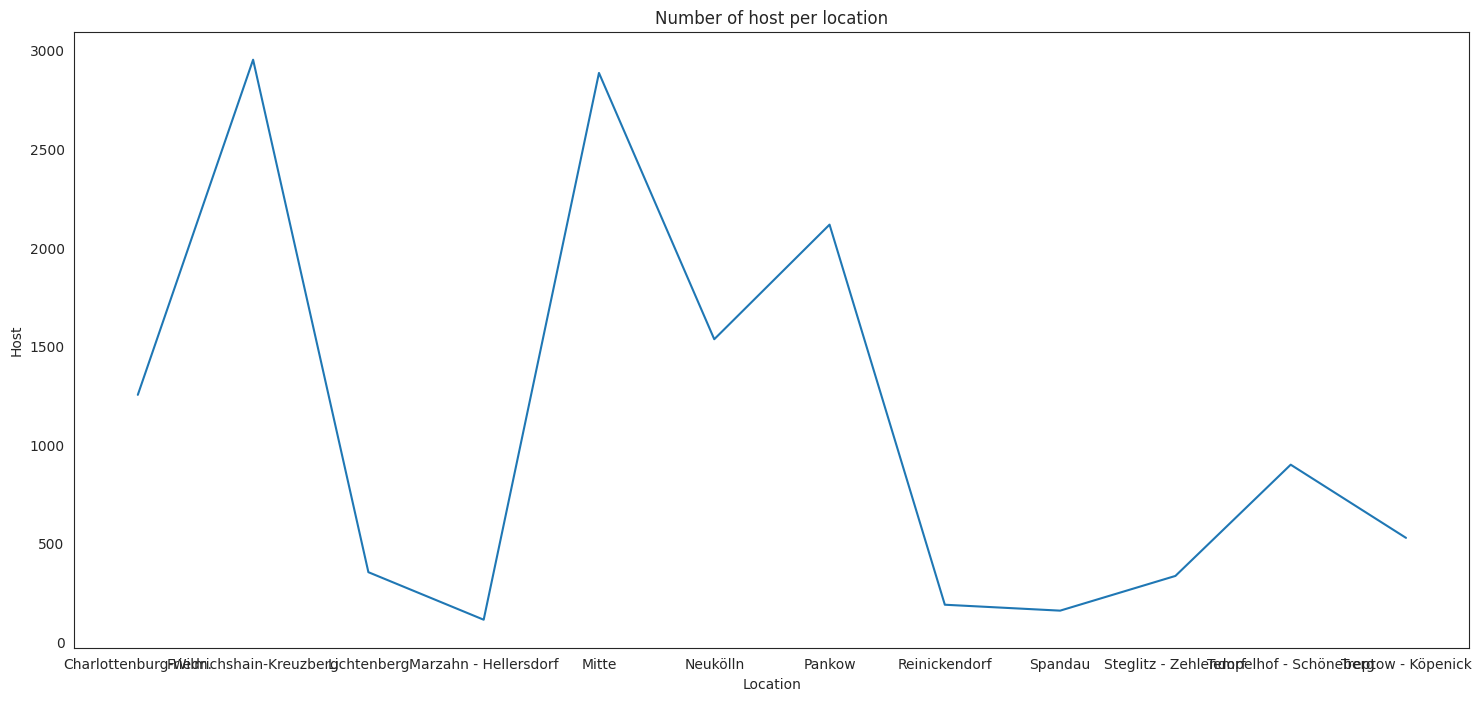

In [ ]:
no_of_host_per_location = dataset.groupby('neighbourhood_group')['host_id'].count()
plt.figure(figsize=(18,8))
plt.plot(no_of_host_per_location )
plt.title('Number of host per location')
plt.ylabel('Host')
plt.xlabel('Location')

**Where the customer pays the highest and lowest rent according  to location**

In [ ]:
#Get the highest rent according to location
max_price_df = dataset.groupby('neighbourhood_group',as_index=False)['price'].max().sort_values(['price'],ascending = False).rename(columns = {'price':'Maximum price','neighbourhood_group':'Location'})
max_price_df

,Location,Maximum price
3,Marzahn - Hellersdorf,24999.0
10,Tempelhof - Schöneberg,3429.0
1,Friedrichshain-Kreuzberg,2500.0
4,Mitte,2500.0
11,Treptow - Köpenick,1200.0
6,Pankow,1146.0
0,Charlottenburg-Wilm.,999.0
5,Neukölln,999.0
2,Lichtenberg,950.0
9,Steglitz - Zehlendorf,885.0


In [ ]:
#Get the lowest rent according to location
min_price_df = dataset.groupby('neighbourhood_group',as_index=False)['price'].min().sort_values(['price'],ascending = True).rename(columns = {'price':'Minimum price','neighbourhood_group':'Location'})
min_price_df

,Location,Minimum price
1,Friedrichshain-Kreuzberg,9.0
0,Charlottenburg-Wilm.,10.0
4,Mitte,10.0
3,Marzahn - Hellersdorf,12.0
8,Spandau,12.0
11,Treptow - Köpenick,12.0
2,Lichtenberg,14.0
6,Pankow,14.0
7,Reinickendorf,14.0
9,Steglitz - Zehlendorf,14.0


In [ ]:
#Get the combine dataframe of minimum and maximum price according to location
merge_price_df = pd.merge(max_price_df, min_price_df, on='Location')
merge_price_df

,Location,Maximum price,Minimum price
0,Marzahn - Hellersdorf,24999.0,12.0
1,Tempelhof - Schöneberg,3429.0,16.0
2,Friedrichshain-Kreuzberg,2500.0,9.0
3,Mitte,2500.0,10.0
4,Treptow - Köpenick,1200.0,12.0
5,Pankow,1146.0,14.0
6,Charlottenburg-Wilm.,999.0,10.0
7,Neukölln,999.0,16.0
8,Lichtenberg,950.0,14.0
9,Steglitz - Zehlendorf,885.0,14.0


**range of values is very big so we will tranform values to plot it**

In [ ]:
#Create a copy of merge price dataframe
merge_price_df_copy = merge_price_df.copy()
#Create a function for log transformation of maximum price and minimum price
def log_values(values):
  new_max_price = np.log2(values)

  return new_max_price

#Apply above function on merge price dataframe
merge_price_df_copy['Maximum price'] = merge_price_df_copy.apply(lambda x: log_values(x['Maximum price']), axis=1)
merge_price_df_copy['Minimum price'] = merge_price_df_copy.apply(lambda x: log_values(x['Minimum price']), axis=1)

Text(0.5, 1.0, 'Maximum and minimum price according to location')

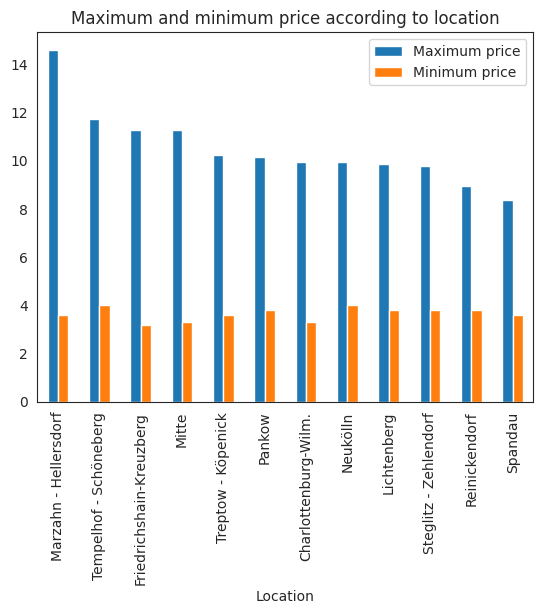

In [ ]:
#Bar graph for display maximum price and minimum price according to location

merge_price_df_copy.plot(x="Location", y=['Maximum price','Minimum price'], kind="bar")
plt.legend(labels = ['Maximum price','Minimum price'])
plt.title('Maximum and minimum price according to location')



**Finding Top 10 Listing Counts**

In [ ]:
dataset['host_id'].count()

13318

In [ ]:
#Creating DataFrame
count_host_id = list(dataset['host_id'].value_counts())
host_id = list(dataset.host_id)
listing_count= list(zip(host_id,count_host_id))
count_host_id_df= pd.DataFrame(listing_count)
count_host_id_df.rename(columns={0:'Host_Id',1:'Counts'},inplace=True)

#Storing top 10 hosts with most listings
top_host_id = count_host_id_df.head(10)
top_host_id

,Host_Id,Counts
0,3718,231
1,33852,76
2,882801,61
3,55531,61
4,64696,59
5,897302,58
6,68997,51
7,898345,50
8,71331,49
9,910884,44


<ipython-input-24-3058c0036e37>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  viz_bar.set_xticklabels(viz_bar.get_xticklabels(), rotation=45)


[Text(0, 0, '3718'),
 Text(1, 0, '33852'),
 Text(2, 0, '882801'),
 Text(3, 0, '55531'),
 Text(4, 0, '64696'),
 Text(5, 0, '897302'),
 Text(6, 0, '68997'),
 Text(7, 0, '898345'),
 Text(8, 0, '71331'),
 Text(9, 0, '910884')]

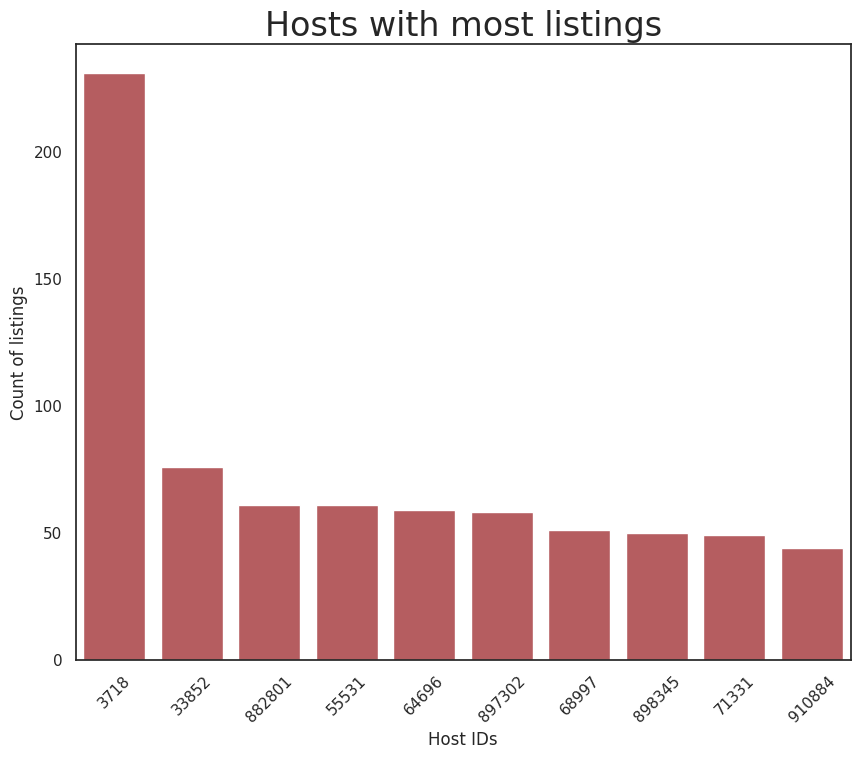

In [ ]:
#Setting the figure size
sns.set(rc={'figure.figsize':(10,8)})

#Setting background colour of chart as white
sns.set_style('white')

#Plotting the Chart
viz_bar = sns.barplot(x= 'Host_Id', y= 'Counts', color='r', data=top_host_id,
                      order=top_host_id.sort_values('Counts',ascending = False).Host_Id)

#Setting font size for title
sns.set(font_scale = 2)

# Naming the Chart
viz_bar.set_title('Hosts with most listings')

# Naming X & Y axis
viz_bar.set_xlabel('Host IDs')
viz_bar.set_ylabel('Count of listings')

#Adjusting Bar labels
viz_bar.set_xticklabels(viz_bar.get_xticklabels(), rotation=45)